In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.plotting.register_matplotlib_converters()
%matplotlib inline


%load_ext autoreload
%autoreload 2
from help_tool import help_tool

#pd.set_option('future.no_silent_downcasting', True)

# Setting graph parameters
sns.set_theme(style='white')

pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data has no duplicates and no missing values, there's 159571 observations and 8 features

In [3]:
train = help_tool.csv_download(
    r'Archive\train.csv')

help_tool.first_look(train)

Dataset has 159571 observations and 8 features
Columns with all empty values []
Dataset has 0 duplicates


,dtypes,"Null values, Count","Null values, %"
id,object,0,0.0
comment_text,object,0,0.0
toxic,int64,0,0.0
severe_toxic,int64,0,0.0
obscene,int64,0,0.0
threat,int64,0,0.0
insult,int64,0,0.0
identity_hate,int64,0,0.0


In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [6]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
train[['toxic', 'severe_toxic']].value_counts()

toxic  severe_toxic
0      0               144277
1      0                13699
       1                 1595
Name: count, dtype: int64

In [10]:
train[train['severe_toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cunt stinks,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckheads for blocking us!,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159096,f871b05d4caa6f20,"You filthy, stinking crow! \n\nI am back! Dirty crow! You better delete (or if not, support the deletion) of all photos of human private parts, you feces-gorging filthy mongrel. Are you a hog? You want to lick anuses overflowing with feces. DIRTY HOG! -",1,1,1,0,1,0
159099,f885a3e2d779342e,now\n\nyou fucking pathetic moron. \n\ncc: Jimbo Wales\n\nrootmyass,1,1,1,0,1,0
159281,fb726deec64157bd,LoL!! \n\nyou're GAY!! you will never know how good it feels to fuck a woman up the ass!!,1,1,1,0,1,1
159312,fbf20e312cd4a78d,"Walter Mercado \n\nAntonio, quite frankly, you're a fucker for comparing Mercado's sexuality to Babe Ruth's alcoholism. Don't assume everybody shares your bigoted, backward views. 98.232.181.201",1,1,1,0,1,0


# Cleaning Data

In [12]:
train['comment_text_original'] = train['comment_text']

# Talk

In [13]:
# Extracting the part that starts with '(talk' and ends with ')'
train['extracted_text'] = train['comment_text'].str.extract(r"(\(talk.*?\))")
train[train['extracted_text'].notnull()]['extracted_text'].value_counts().head(10)

extracted_text
(talk)                       3099
(talk • contribs)             501
(talk · contribs)             154
(talk | contribs)             101
(talk to me)                   62
(talk · contribs)              58
(talk|contribs)                54
(talk · contribs · email)      48
(talk - contribs)              38
(talk • contrib)               34
Name: count, dtype: int64

In [14]:
# Removing the part of the string that matches the pattern
train['comment_text'] = train['comment_text'].str.replace(r"\(talk.*?\)", "", regex=True)

# UTC

In [15]:
train['comment_text'].str.extract(r"(\(UTC.*?\))").drop_duplicates()

,0
0,NaN
1,(UTC)
4598,(UTC+5:30)
19501,(UTC+1)
23640,(UTC−5)
24048,(UTC/GMT)
43415,(UTC+01)
61267,(UTC+0)
67088,(UTC−4)
86619,(UTC )


In [16]:
train['comment_text'] = train['comment_text'].str.replace(r"\(UTC.*?\)", "", regex=True)

## Extract Information from URLs
In some cases, the domain or specific keywords within the URL might provide context (e.g., links to specific news sites or social media platforms)

In [17]:
train['comment_text'] = train['comment_text'].apply(help_tool.replace_url_with_domain)


train[train['id'] == 'fbf8672ea3b4ddf7']

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_original,extracted_text
159315,fbf8672ea3b4ddf7,nysun - public interest crap..,1,0,0,0,0,0,http://www.nysun.com/article/23698 - public interest crap..,NaN


## Time and API adress

In [18]:
combined_pattern = (
    r'\b(?:\d{1,2}, \d{1,2} [A-Za-z]{3,10} \d{4}|'  # "31, 19 July 2006"
    r'\d{1,2} \d{1,2} [A-Za-z]{3,10} \d{4}|'  # "31 19 July 2006"
    r'\d{1,2} [A-Za-z]{3,10}, \d{4}|'  # "31 July, 2006"
    r'\d{1,2} [A-Za-z]{3,10} \d{4}|'  # "31 July 2006"
    r'\d{1,2}, [A-Za-z]{3,10} \d{4}, \d{1,2}:\d{2}|'  # "31, July 2006, 18:47"
    r'\d{1,2} [A-Za-z]{3,10} \d{4}, \d{1,2}:\d{2}|'  # "31 July 2006, 18:47"
    r'\d{1,2} [A-Za-z]{3,10} \d{4} \d{1,2}:\d{2}|'  # "31 July 2006 18:47"
    r'\d{1,2}:\d{2}, [A-Za-z]{3,10} \d{1,2}, \d{4}|'  # "18:47, July 31, 2006"
    r'\d{1,2}:\d{2}, \d{1,2} [A-Za-z]{3,10} \d{4}|'  # "18:47, 31 July 2006"
    r'\d{1,2}:\d{2} \d{1,2} [A-Za-z]{3,10} \d{4}|'  # "18:47 31 July 2006"
    r'\d{1,2} [A-Za-z]{3,10} \d{1,2}:\d{2}|'  # "26 July 17:03 UTC"
    r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b'  # IP address
    r')\b'
)


# Remove the date pattern from the 'comment_text' column
train['comment_text'] = train['comment_text'].str.replace(combined_pattern, '', regex=True).str.strip()

train[train['id'] == '000103f0d9cfb60f']

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_original,extracted_text
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm seemingly stuck with. Thanks.,0,0,0,0,0,0,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",(talk)


# NOTs 

In [19]:
def expand_contractions(text):
    contractions_dict = {
        "can't": "can not",
        "won't": "will not",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "hasn't": "has not",
        "haven't": "have not",
        "hadn't": "had not",
        "doesn't": "does not",
        "don't": "do not",
        "didn't": "did not",
        "won't": "will not",
        "wouldn't": "would not",
        "shouldn't": "should not",
        "mightn't": "might not",
        "mustn't": "must not",
        "couldn't": "could not"
    }

    # Regular expression for finding contractions
    contractions_re = re.compile(r'\b(' + '|'.join(re.escape(key) for key in contractions_dict.keys()) + r')\b')

    # Replace contractions using the dictionary
    expanded_text = contractions_re.sub(lambda match: contractions_dict[match.group(0)], text)
    
    return expanded_text

train['comment_text'] = train['comment_text'].apply(expand_contractions)

## Wikipedia shortcuts and images

In [20]:
train['comment_text'] = train['comment_text'].replace(
    {'Wikipedia:': '', 'WP:': '', 'Category:': '', 'disambiguation': '', 'otheruses': ''
     })

In [21]:
train = train[~ train['comment_text'].str.contains("Navbox")]

In [22]:
train['comment_text'] = train['comment_text'].apply(help_tool.replace_filenames)

## Text normalization

In [23]:
train['comment_text'] = train['comment_text'].apply(help_tool.clean_text)
train[train['id'] == 'fbf8672ea3b4ddf7']

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_original,extracted_text
159315,fbf8672ea3b4ddf7,nysun public interest crap,1,0,0,0,0,0,http://www.nysun.com/article/23698 - public interest crap..,NaN


## Remove Stop Words (Optional)
Stop words (e.g., "and", "the", "is") are common words that may not carry much information.

In [24]:
train['comment_text'] = train['comment_text'].apply(help_tool.remove_stopwords)


## English leters

In [25]:
train['comment_text'] = train['comment_text'].apply(help_tool.remove_non_ascii)

In [26]:
train = train[train['comment_text'] != '']

# Dublicated values

In [27]:
train[train['comment_text'].duplicated()].shape

(1707, 10)

In [28]:
train = train[~train['comment_text'].duplicated()]

In [29]:
train.shape

(157572, 10)

In [30]:
train[train['id'] == '0002bcb3da6cb337']

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_original,extracted_text
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,NaN


In [31]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_original,extracted_text
0,0000997932d777bf,explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since im retired,0,0,0,0,0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",NaN
1,000103f0d9cfb60f,daww matches background colour im seemingly stuck thanks,0,0,0,0,0,0,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",(talk)
2,000113f07ec002fd,hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",NaN
3,0001b41b1c6bb37e,make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,NaN
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,"You, sir, are my hero. Any chance you remember what page that's on?",NaN


# Lenght

In [32]:
train['word_count'] = train['comment_text'].apply(lambda x: len(x.split(" ")))

In [33]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'comment_text_original', 'extracted_text',
       'word_count'],
      dtype='object')

In [34]:
train[['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate',
       'word_count']].value_counts()

toxic  severe_toxic  obscene  threat  insult  identity_hate  word_count
0      0             0        0       0       0              4             5740
                                                             5             5209
                                                             6             4984
                                                             3             4877
                                                             7             4712
                                                                           ... 
1      0             1        0       0       0              148              1
                                                             151              1
                                                             155              1
                                                             156              1
       1             1        1       1       1              915              1
Name: count, Length: 2209, dtype: int64

# Word Count

In [35]:
word_df = train[['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate',
       'word_count']]

In [36]:
word_df[(word_df['toxic'] == 0) & (word_df['severe_toxic'] == 0) & (word_df['obscene'] == 0) & (word_df['threat'] == 0) & (word_df['insult'] == 0) & (word_df['identity_hate'] == 0)]['word_count'].describe()

count    141544.000000
mean         34.601219
std          50.650285
min           1.000000
25%           9.000000
50%          19.000000
75%          39.000000
max        1250.000000
Name: word_count, dtype: float64

In [34]:
word_df[(word_df['toxic'] == 1)]['word_count'].describe()

count    15102.000000
mean        27.753211
std         67.215564
min          1.000000
25%          6.000000
50%         12.000000
75%         24.000000
max       1250.000000
Name: word_count, dtype: float64

Severe toxic is a subset of Toxic

In [41]:
word_df[(word_df['severe_toxic'] == 1)]['toxic'].value_counts()

toxic
1    1574
Name: count, dtype: int64

In [45]:
word_df[(word_df['obscene'] == 1)]['word_count'].describe()

count    8333.000000
mean       27.584303
std        68.069875
min         1.000000
25%         6.000000
50%        11.000000
75%        23.000000
max      1235.000000
Name: word_count, dtype: float64

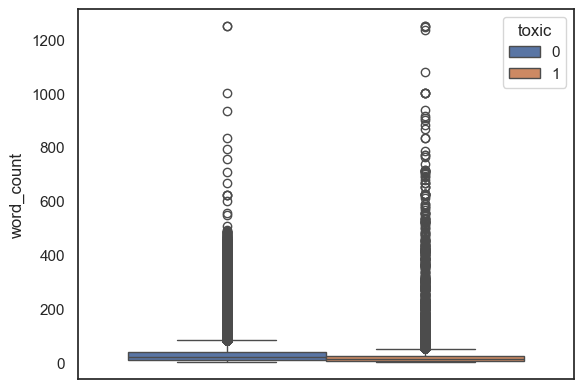

In [58]:
sns.boxplot(word_df, y='word_count', hue='toxic')
plt.show()

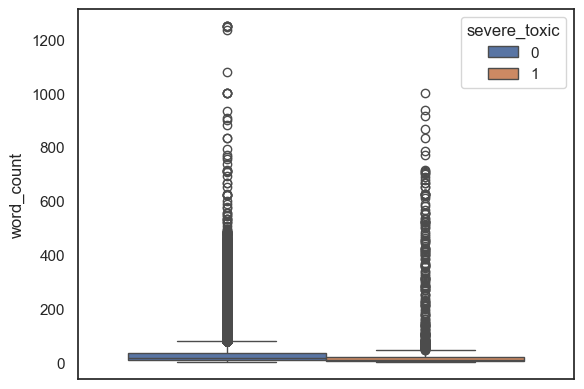

In [59]:
sns.boxplot(word_df, y='word_count', hue='severe_toxic')
plt.show()

# Label Distirbution

In [37]:
train[
    (train['toxic'] == 0)
    &
    (train['severe_toxic'] == 0)
    &
    (train['obscene'] == 0)
    &
    (train['threat'] == 0)
    &
    (train['insult'] == 0)
    &
    (train['identity_hate'] == 0)
      ].shape[0] / train.shape[0] * 100

89.82814205569517

In [61]:
train.drop(columns=['id', 'comment_text']).sum() / train.shape[0] * 100

In [ ]:
toxic_df = train[
    (train['toxic'] == 1)
    |
    (train['severe_toxic'] == 1)
    |
    (train['obscene'] == 1)
    |
    (train['threat'] == 1)
    |
    (train['insult'] == 1)
    |
    (train['identity_hate'] == 1)
      ].drop(columns=['id', 'comment_text'])

In [ ]:
toxic_df.sum() / toxic_df.shape[0] * 100

toxic            94.224772
severe_toxic      9.829113
obscene          52.001996
threat            2.900087
insult           48.534364
identity_hate     8.650368
dtype: float64

Is one label a subgroup of another?

In [ ]:
toxic_df[toxic_df['toxic'] == 0].value_counts()

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             1        0       0       0                316
                     0        0       1       0                299
                     1        0       1       0                181
                     0        0       0       1                 54
                                      1       1                 27
                              1       0       0                 21
                     1        0       1       1                 18
                     0        1       1       0                  3
                     1        0       0       1                  3
                              1       0       0                  2
                                      1       0                  2
Name: count, dtype: int64

In [22]:
toxic_df[['insult', 'identity_hate']].value_counts()

insult  identity_hate
0       0                8011
1       0                6636
        1                1146
0       1                 241
Name: count, dtype: int64

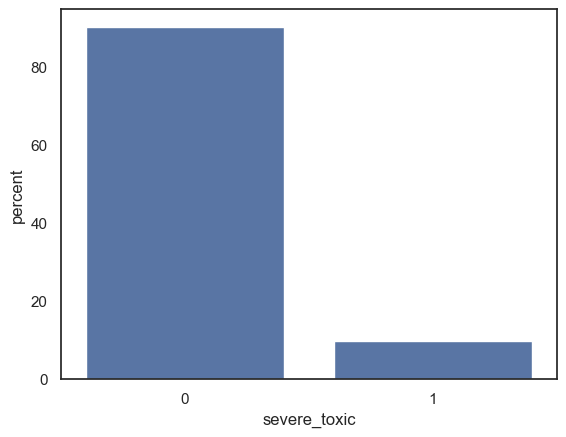

In [23]:
sns.countplot(data=toxic_df, x='severe_toxic', stat="percent")
plt.show()

In [24]:
train['comment_text'].apply(lambda x: len(x.split(" "))).describe()

count    157756.000000
mean         34.348247
std          52.888415
min           1.000000
25%           9.000000
50%          18.000000
75%          38.000000
max        1250.000000
Name: comment_text, dtype: float64

50% of the abstracts have a length of 18. So, any number close to that value is a good enough approximate for the maximum sequence length.

In [25]:
max_seqlen = 18

In [26]:
train['word_count'] = train['comment_text'].apply(lambda x: len(x.split(" ")))

In [27]:
train['word_count'].describe()

count    157756.000000
mean         34.348247
std          52.888415
min           1.000000
25%           9.000000
50%          18.000000
75%          38.000000
max        1250.000000
Name: word_count, dtype: float64

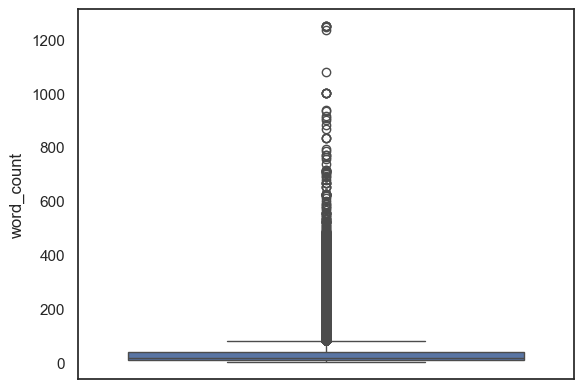

In [28]:
sns.boxplot(train['word_count'])
plt.show()

In [29]:
threshold = train['word_count'].quantile(0.9)
threshold

77.0

In [30]:
train[train['word_count'] > threshold].drop(columns=['id', 'comment_text']).sum() / train.drop(columns=['id', 'comment_text']).sum() * 100

toxic             5.824729
severe_toxic     10.279188
obscene           5.720796
threat            5.376344
insult            5.011565
identity_hate     6.921413
word_count       44.402066
dtype: float64

In [31]:
train[train['word_count'] < threshold].drop(columns=['id', 'comment_text']).sum() / train.drop(columns=['id', 'comment_text']).sum() * 100

toxic            94.056129
severe_toxic     89.657360
obscene          94.183257
threat           94.623656
insult           94.872783
identity_hate    93.006489
word_count       55.221364
dtype: float64

In [32]:
clean_data['word_count'] = clean_data['comment_text'].apply(lambda x: len(x.split(" ")))
clean_data['word_count'].describe()

NameError: name 'clean_data' is not defined

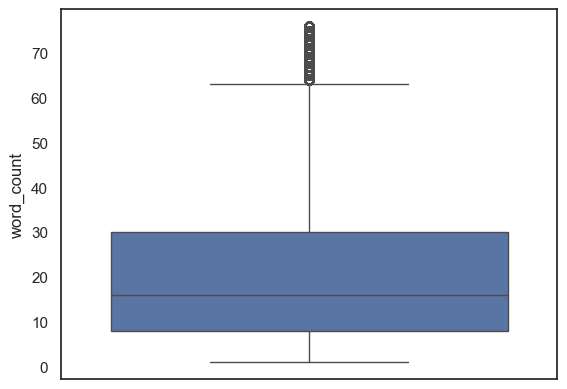

In [ ]:
sns.boxplot(clean_data['word_count'])
plt.show()

In [38]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'comment_text_original', 'extracted_text',
       'word_count'],
      dtype='object')

In [40]:
train[['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']].to_csv(r'Archive\clean_data.csv')